In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/train.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [2]:
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0].head(15)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
dtype: int64

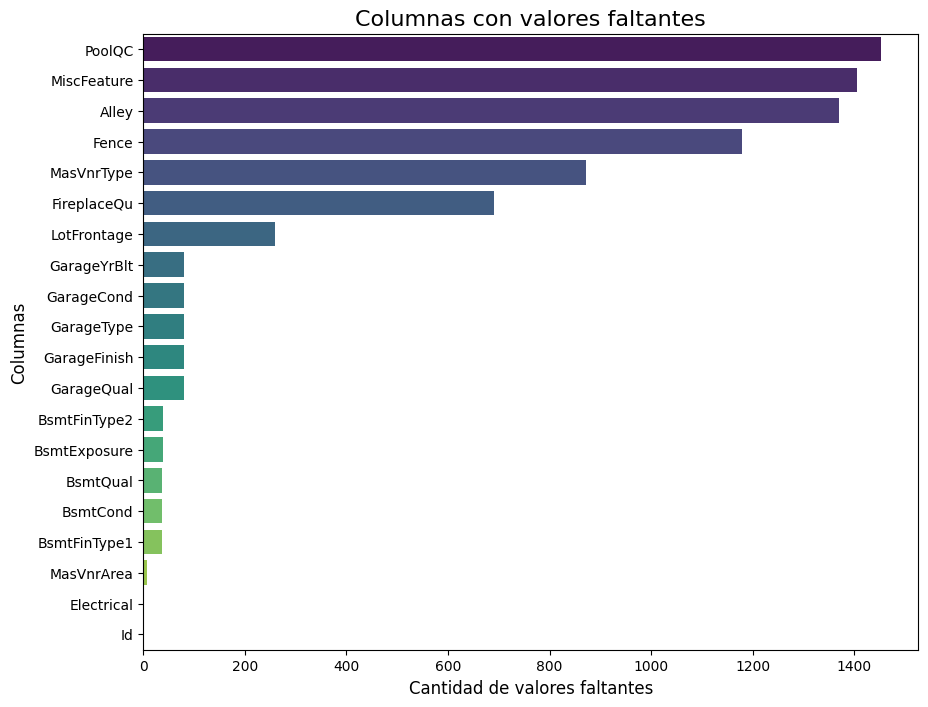

In [3]:
top_missing = missing.head(20)
plt.figure(figsize=(10, 8))
sns.barplot(
    x=top_missing.values,
    y=top_missing.index,
    hue=top_missing.index,
    palette="viridis",
    legend=False
)

plt.title("Columnas con valores faltantes", fontsize=16)
plt.xlabel("Cantidad de valores faltantes", fontsize=12)
plt.ylabel("Columnas", fontsize=12)
plt.show()


Desde PoolQc hasta Fence vamos a eliminar ya que hay demasiados valores faltantes
FirePlaceQu, Garage*. Bsmt*, MasvnrType vamos a rellenar los Nan por "None"
MasVnrArea y GarageYrBlt rellenamos con 0
LotFrontage rellenar con media por vecindario



In [4]:
#devuelve el LotFrontage agrupado por el vecindario, el metodo transform sobreescribe la columna copiando los mismos datos excepto los datos vacios gracias a la funcion lambda
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median())
)


cols_none = [
    "PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu",
    "GarageType", "GarageFinish", "GarageQual", "GarageCond",
    "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"
]

for cols in cols_none:

    df[cols] = df[cols].fillna("None")

cols_zero = [
    "GarageYrBlt", "GarageArea", "GarageCars",
    "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF"
]

for cols in cols_zero:
    df[cols] = df[cols].fillna(0)

df["MasVnrType"] = df["MasVnrType"].fillna("None")
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)
df["Electrical"] = df["Electrical"].fillna(df["Electrical"].mode()[0])

df = df.drop(["PoolQC", "MiscFeature", "Alley", "Fence"], axis = 1)

faltantes = df.isnull().sum().sum()
print(f"Valores faltantes totales después de limpieza: {faltantes}")

Valores faltantes totales después de limpieza: 0


TERMINA FASE lIMPIEZA
EMPIEZA FASE 4 ANALISIS EXPLORATORIO EDA

Text(0, 0.5, 'Frecuencia')

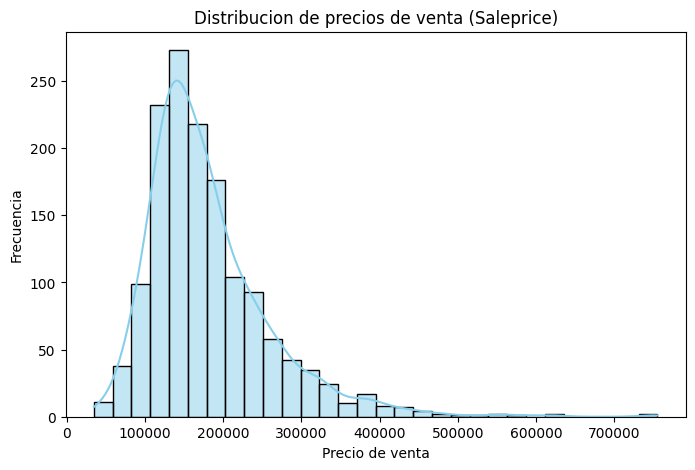

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df["SalePrice"], kde = True, color = "skyblue", bins = 30)
plt.title("Distribucion de precios de venta (Saleprice)")
plt.xlabel("Precio de venta")
plt.ylabel("Frecuencia")

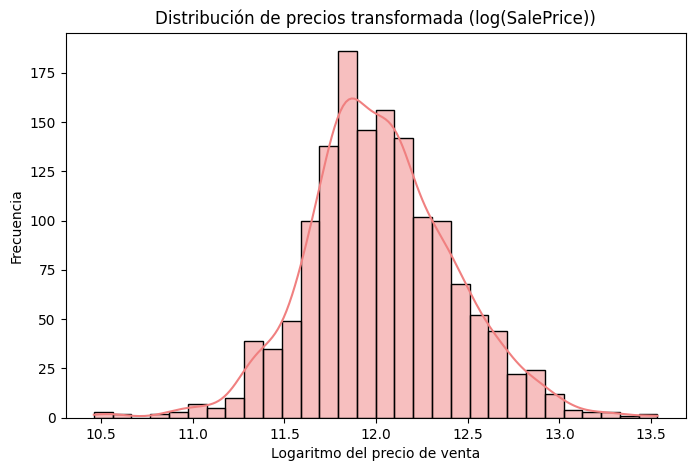

In [6]:
import numpy as np

# Aplicar transformación logarítmica
df["SalePrice_log"] = np.log1p(df["SalePrice"])
plt.figure(figsize=(8,5))
sns.histplot(df["SalePrice_log"], kde=True, color="lightcoral", bins=30)
plt.title("Distribución de precios transformada (log(SalePrice))")
plt.xlabel("Logaritmo del precio de venta")
plt.ylabel("Frecuencia")
plt.show()

In [7]:
correlation = df.corr(numeric_only= True)["SalePrice_log"].sort_values(ascending= False)
print("Variables más correlacionadas con el precio de venta (log):")
print(correlation.head(15))

Variables más correlacionadas con el precio de venta (log):
SalePrice_log    1.000000
SalePrice        0.948374
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.426776
BsmtFinSF1       0.372023
Name: SalePrice_log, dtype: float64


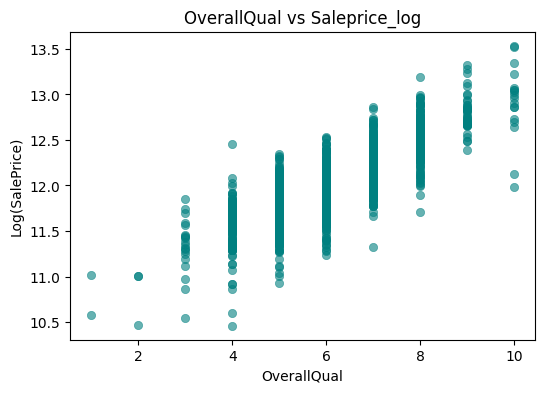

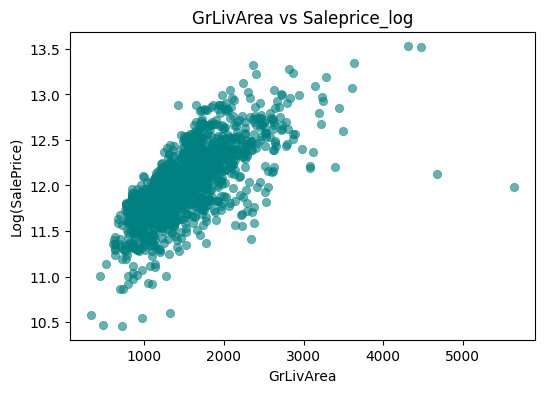

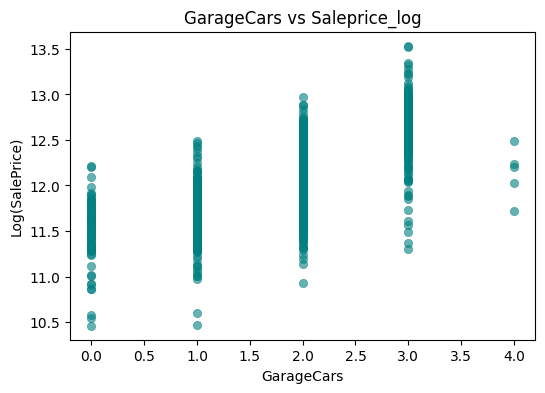

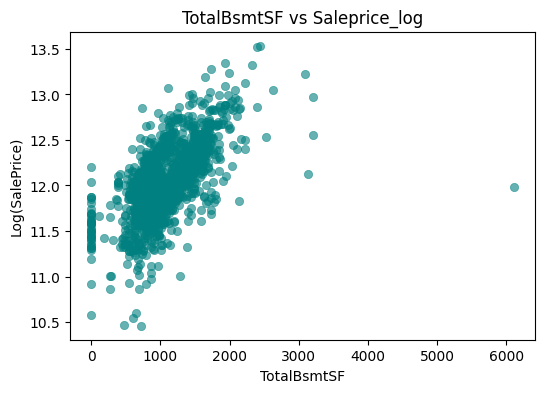

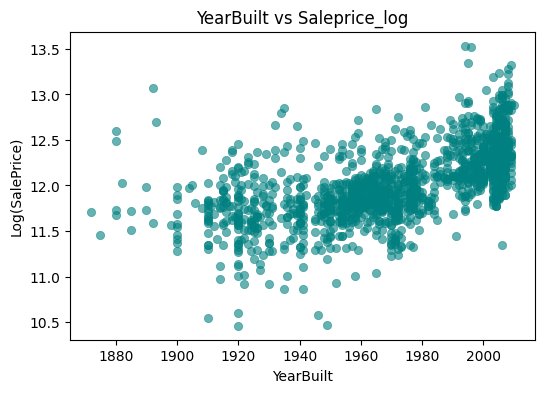

In [8]:
#GRAFICOS DE DISPERSION
top_features = ["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "YearBuilt"]

for col in top_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y= df["SalePrice_log"], alpha = 0.6, color = "teal", edgecolor = None)
    plt.title(f"{col} vs Saleprice_log")
    plt.xlabel(col)
    plt.ylabel("Log(SalePrice)")
    plt.show()

In [9]:
from sklearn.model_selection import train_test_split
#Esto nos da una función para separar los datos en entrenamiento y prueba.
from sklearn.preprocessing import StandardScaler
#Para escalar/normalizar las features numéricas (ponerlas en la misma escala).
from sklearn.linear_model import LinearRegression
#Este es el modelo que vamos a entrenar: regresión lineal.
from sklearn.metrics import r2_score, mean_squared_error
import math
#r2_score: mide qué tan bien el modelo explica el objetivo.

#mean_squared_error: calcula el error cuadrático medio.

#math.sqrt(...): usamos la raíz cuadrada para sacar RMSE.

In [10]:
df_model = pd.get_dummies(df, drop_first=True)
print("Shape despues del encoding", df_model.shape)


Shape despues del encoding (1460, 249)


In [11]:
X = df_model.drop(columns = ['SalePrice', 'SalePrice_log'])
y = df_model['SalePrice_log']
#La x es lo que usamos para predecir, osea todas las variables explicativas y la y es lo que queremos predecir

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)
print("Train shape", X_train.shape)
print("Test shape", X_test.shape)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Escalado completado") 
#el escalado pone a todas las variables en la misma escala estadistica, si no tuviesemos el scaler
#las variables con numeros mas grandes tendrian mas influencia en el modelo



Train shape (1168, 247)
Test shape (292, 247)
Escalado completado


In [12]:
model = LinearRegression()
#creamos un modelo de regresion lineal
#regresion lineal significa que el modelo va a intentar encontrar una combinacion lineal de todas tus variables para predecir el precio en log

model.fit(X_train_scaled, y_train)
#este es el momento que el modelo aprende
#x train scaled tiene todas las caracteristicas de tus casas ya escaladas e y train es el valor real que queres que aprenda a predecir

y_pred = model.predict(X_test_scaled)
#ahora le damos modelos de casa que nunca vio antes, que son las filas de xtestscaled
#predict() le dice al modelo ok segun lo que aprendiste cual seria el precio log de estas casas

r2 = r2_score(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(f"R2 del modelo: {r2:.4f}")
print(f"MSE del modelo: {mse:.4f}")
print(f"RMSE del modelo: {rmse:.4f}")

R2 del modelo: -607246393840239247360.0000
MSE del modelo: 113318849871651225600.0000
RMSE del modelo: 10645132684.5489


In [20]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

models = {
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.001, max_iter=10000),
    "Random Forest": RandomForestRegressor(n_estimators=190, random_state=42)
}

results = []

for name, m in models.items():
    m.fit(X_train_scaled, y_train)
    y_pred = m.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    rmse = math.sqrt(mean_squared_error(y_test, y_pred))
    results.append((name, r2, rmse))
    print(f"{name}: R² = {r2:.4f} | RMSE = {rmse:.4f}")

pd.DataFrame(results, columns=["Modelo", "R²", "RMSE"]).sort_values(by="R²", ascending=False)


Ridge Regression: R² = 0.7836 | RMSE = 0.2010
Lasso Regression: R² = 0.8415 | RMSE = 0.1720
Random Forest: R² = 0.8819 | RMSE = 0.1485


,Modelo,R²,RMSE
2,Random Forest,0.881874,0.148471
1,Lasso Regression,0.841534,0.171964
0,Ridge Regression,0.783577,0.200965
